# Image Classification of Pnemounia presence with Deep Learning

## 1. Business Understanding

### (a) Introduction

Pneumonia is an infection that causes inflammation in one or both of the lungs and may be caused by a virus,bacteria,fungi or other germs.When pneumonia is suspected, a chest X_ray is often recommended as part of the diagnostic process.
A chest X-ray helps the doctor diagnose pneumonia and determine the exact location of the infection.X-ray images helps to confirms the presence of pneumonia by showing areas of opacity in the lungs,which are indicative of inflammation.
In the X-ray image, pneumonia is often seen as a white or gray patch(or patches),which represents the area of the lung affected by pneumonia. The rest of the lung appears darker on the X-ray image.The contrast allows the doctor to identify areas of pneumonia.However, while X-rays are a valuable tool in diagnosing pneumonia,they do have limitations.For instance, it's often difficult to diagnose pneumoia in people with pre-existing lung diseases since their lungs may already show abnormalities on the X-ray.Due to some of this limitations in diagnosing the presence of pnemonia, the Radiology department in conjuction with the Health Information Department(HIM) department have seen the need to employ data analysis to help them build a neural network that may help in the diagnosis of pneumonia.

The Radiolody Department in Kenyatta National Hospital(KNH) is equipped with state-of-the-art equipment.The department offers various specialized services to both adults and children,which include CT Scans,MRI(with sedation and anaesthesia), Ultrasound and Interventional Radiology.They carry out both non-vascular and vascular procedures such as image guided biopsies of the lungs among others.
On the other hand, the Health Information Management(HIM)department is responsible for collection, analysis and the protection of digital and traditional medical information vital to providing quality patient care.They ensure that data is properly stored, cleaned and made available for use.They also play a cricial role in ensuring that all data management practices comply with the various legal and ethical standards which includes things like patients privacy laws and regulation related to the storage of medical data.
The collaboration of this two departments is crucial in the effective running of KNH since the Radiology department generates vast amounts of data from various imaging procedures. This data needs to be properly managed to ensure it can be easily accessed and used by healthcare providers and this where the HIM Department comes in.

This project aims to develop a neural network model for the detection of pneumonia from chest X-ray images inorder to help the radiologist and other healthcare providers in Kenyatta National Hospital to make more accurate diagnoses by identifying patterns in X-ray images that may be difficult for humans to detect.By providing preliminary diagnosis,the model can save radiologists time,allowing them to focus on more complex cases, faster and more accurate diagnosis means that patients can receive treatment sooner,potentially leading to better outcomes.
This project represents an opportunity to leverage advanced neural network technology to improve healthcare delivery at Kenyatta National Hospital.

### (b) The Problem Statement

Pneumonia is a common lung infection caused by bacteria, a virus or fungi.It is a major cause of death among all age groups resulting in 2.56 million deaths worldwide in 2017. The diadnosis of pneumonia involves a physical exam followed by a chest X-ray. However, the interpretation of chest X-rays requires expert knowledge and can be time consuming.Morever, the accuracy of diagnosis can vary based on the experience and expertise of the radiologist.Since false diagnosis of pneumonia to escalated medical conditions,increased risk of infection and incorect treatment,there is a need for an automated, reliable and efficient method to interpret chest X-rays and diagnose pneumonia.
This project aims to develop a neural network model that can accurately detect pneumonia from chest X-rays images,thereby assisting radiologists in Kenyatta National Hospital in diagnosis,reducing the time taken for diagnosis and ultimately leading to timely treatment and improved patient outcomes.

### (c) Defining a Metric of Success

- **Model Performance**
This project will prioritize recall inorder to reduce the chances of the model to miss pneumonia cases and F1 score inorder to balance the trade off between precision and recall.
The model will be demeaned successfull if it can archieve a recall of atleast 80% and an F1 score of atleast 0.7

- **Cost Effectiveness**
This project will be deamened successfull if it can reduce the cost associated with pneumonia diagnostics by atleast 10%.This could be measured in terms of time spent by radiologists on diagnosing pneumonia or reduced hospitalization time due to earlier diagnostics.

- **Patient Outcomes**
The project will be deamened successful if it can improve user outcomes such as reduced mortality and morbidity rates among patients diagnosed with pneumonia.

- **Model Generalization**
This project will be deamened successfull if the model is able to generalize well to the test data set.


### (d) The Main Objective

To develop a neural network that can accurately detect pneumonia from the chest X-rays images, thereby assisting radiologists in diagnosis,reducing time taken for diagnosis and ultimately leading to timely treatment and improved patient outcomes.

### (e) Specific objectives

(i) Understand the distribution of pneumonia and non-pneumonia cases in the dataset

(ii) Analyze the characteristics of chest X-ray images

(iii) Identify potential correlations or patterns in the data.

(iv) Evaluate the quality and usability of the data for model training



### (f) Research Questions

(i) What is the propotion of pneumonia to non-pnemonia in tha dataset?

(ii) What are te common characteristics of chest X-ray images with pneumonia and how do they differ from those without pnemonia?

(iii) Are there any noticeable patterns or correlations in the chest X-ray images that might be indicative of pneumonia?

(iv)Is the data quality sufficient for training the neural network model and there any issues with the data such as quality of images?

### (g) Data Relevance


## 2. Importing relevant Libraries

In [50]:
import os
from PIL import Image, ImageStat
import matplotlib.pyplot as plt
import numpy as np
from PIL import ImageEnhance
from keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import SMOTE
from skimage import filters,img_as_ubyte
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.metrics import Recall, Precision
from keras import backend as K
import tensorflow_addons as tfa




c:\New folder\envs\learn-env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


## 3. Reading and Checking the Data

In [2]:
# specifying your paths for the train set
paths = ["Data/train/NORMAL/", "Data/train/PNEUMONIA/"]

# creating a list to hold your images and labels
images = []
labels = []

# iterating over both directories
for path in paths:
    for filename in os.listdir(path):
        if filename.endswith(".jpeg"):  # or whatever file extension you're using
            img = Image.open(os.path.join(path, filename))
            images.append(img)
            # add a label for this image (1 for PNEUMONIA, 0 for NORMAL)
            if "PNEUMONIA" in path:
                labels.append(1)
            else:
                labels.append(0)


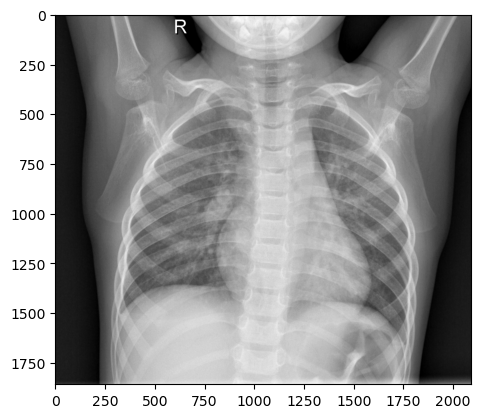

0


In [3]:
# viewing into the first image
plt.imshow(images[0], cmap='gray')
plt.show()
print(labels[0])

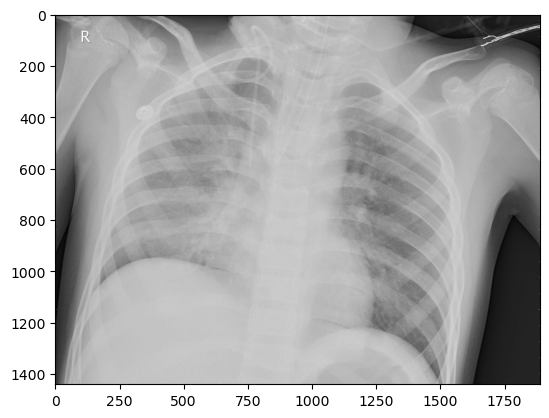

1


In [4]:
#viewing the 2000th image
plt.imshow(images[2000], cmap='gray')
plt.show()
print(labels[2000])

In [5]:
# checking the length of the images in the traintest
print(f"There are {len(images)} images in the training set")

There are 5216 images in the training set


In [6]:
# counting of normal images
normal_count = labels.count(0)

# counting of pneumonia images
pneumonia_count = labels.count(1)

print(f"Number of normal images: {normal_count}")
print(f"Number of pneumonia images: {pneumonia_count}")


Number of normal images: 1341
Number of pneumonia images: 3875


In [7]:
# specifying your paths for the validation set
paths = ["Data/val/NORMAL/", "Data/val/PNEUMONIA/"]

# creating a list to hold your images and labels
images_val = []
labels_val = []

# iterating over both directories
for path in paths:
    for filename in os.listdir(path):
        if filename.endswith(".jpeg"):  # or whatever file extension you're using
            img = Image.open(os.path.join(path, filename))
            images_val.append(img)
            # add a label for this image (1 for PNEUMONIA, 0 for NORMAL)
            if "PNEUMONIA" in path:
                labels_val.append(1)
            else:
                labels_val.append(0)


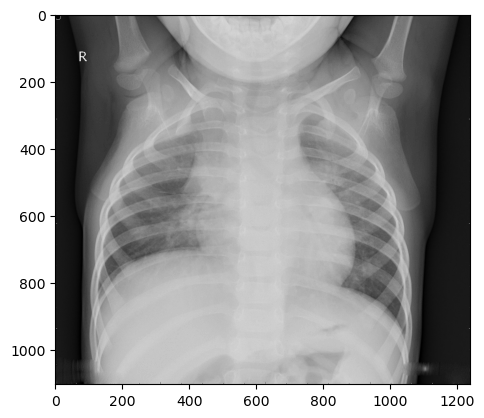

0


In [8]:
#viewing the fifth image in the validation set
plt.imshow(images_val[4], cmap='gray')
plt.show()
print(labels_val[4])


In [9]:
#checking image count in the validation set
print(f"There are {len(images_val)} images in the validation set set")


There are 16 images in the validation set set


In [10]:
# counting of normal images
normal_count = labels_val.count(0)

# counting of pneumonia images
pneumonia_count = labels_val.count(1)

print(f"Number of normal images: {normal_count}")
print(f"Number of pneumonia images: {pneumonia_count}")



Number of normal images: 8
Number of pneumonia images: 8


In [11]:
# specifying your paths for the test set
paths = ["Data/test/NORMAL/", "Data/test/PNEUMONIA/"]

# creating a list to hold your images and labels
images_test = []
labels_test = []

# iterating over both directories
for path in paths:
    for filename in os.listdir(path):
        if filename.endswith(".jpeg"):  # or whatever file extension you're using
            img = Image.open(os.path.join(path, filename))
            images_test.append(img)
            # add a label for this image (1 for PNEUMONIA, 0 for NORMAL)
            if "PNEUMONIA" in path:
                labels_test.append(1)
            else:
                labels_test.append(0)


In [12]:
#checking image count in the test set
print(f"There are {len(images_test)} images in the validation set set")


There are 624 images in the validation set set


In [13]:
# counting of normal images
normal_count = labels_test.count(0)

# counting of pneumonia images
pneumonia_count = labels_test.count(1)

print(f"Number of normal images: {normal_count}")
print(f"Number of pneumonia images: {pneumonia_count}")


Number of normal images: 234
Number of pneumonia images: 390


## 4.   Data wrangling

#### (i) Image Resizing

In [14]:
#creating a function to convert the images to arrays
def convert_to_numpy(image_list):
    numpy_images = []
    for img in image_list:
        try:
            if isinstance(img, Image.Image): # Checking if img is a PIL Image
                img = np.array(img) # Converting PIL image to numpy array
            else:
                print(f"Warning: Image is not a PIL Image. Skipping.")
            numpy_images.append(img)
        except Exception as e:
            print(f"Warning: Could not convert image to numpy array. Skipping. Error: {e}")
    return numpy_images

In [15]:
#invoking the function on the lists
images = convert_to_numpy(images)
images_val = convert_to_numpy(images_val)
images_test = convert_to_numpy(images_test)

In [16]:
#creating a function to resize the images
def resize_images(image_list, size):
    resized_images = []
    for img in image_list:
        try:
            if isinstance(img, np.ndarray):
                if img.dtype == 'object':
                    print("Warning: Image is a numpy array of type 'object', conversion to 'uint8' might fail.")
                img = Image.fromarray(img.astype('uint8')) # Converting numpy array to PIL image
                img = img.resize(size)
                resized_images.append(np.array(img)) # Converting PIL image back to numpy array
            else:
                print("Warning: Image is not a numpy array, skipping.")
        except Exception as e:
            print(f"Warning: Could not resize image. Skipping. Error: {e}")
    return resized_images

In [17]:
#allocating the size
size =(224,224)
#invoking the resize function
images = resize_images(images, size)
images_val = resize_images(images_val, size)
images_test = resize_images(images_test, size)

In [18]:
images[0].shape

(224, 224)

In [19]:
images_val[0].shape

(224, 224)

In [20]:
images_test[0].shape

(224, 224)

The images belonging to the train,validation and test set have been resized to a 300 by 300 image size.This is because the size is large enough to contain important details such as the contrast in the X-rays but also not large enough that it becomes computationally expensive.
All the images have been resized to the same dimensions because CNN requires same dimensions for all the images because of the fixed number of weights in the network and also fot computational efficiency.

#### (ii) Image Pixel Normalization

In [21]:
#creating a function to if the images are in 8-bit
def check_bit_depth(image_list):
    for i, img in enumerate(image_list):
        if img.dtype == 'uint8':
            print(f"Image {i} is 8-bit.")
        else:
            print(f"Image {i} is not 8-bit.")

# invoking the function
check_bit_depth(images)

Image 0 is 8-bit.
Image 1 is 8-bit.
Image 2 is 8-bit.
Image 3 is 8-bit.
Image 4 is 8-bit.
Image 5 is 8-bit.
Image 6 is 8-bit.
Image 7 is 8-bit.
Image 8 is 8-bit.
Image 9 is 8-bit.
Image 10 is 8-bit.
Image 11 is 8-bit.
Image 12 is 8-bit.
Image 13 is 8-bit.
Image 14 is 8-bit.
Image 15 is 8-bit.
Image 16 is 8-bit.
Image 17 is 8-bit.
Image 18 is 8-bit.
Image 19 is 8-bit.
Image 20 is 8-bit.
Image 21 is 8-bit.
Image 22 is 8-bit.
Image 23 is 8-bit.
Image 24 is 8-bit.
Image 25 is 8-bit.
Image 26 is 8-bit.
Image 27 is 8-bit.
Image 28 is 8-bit.
Image 29 is 8-bit.
Image 30 is 8-bit.
Image 31 is 8-bit.
Image 32 is 8-bit.
Image 33 is 8-bit.
Image 34 is 8-bit.
Image 35 is 8-bit.
Image 36 is 8-bit.
Image 37 is 8-bit.
Image 38 is 8-bit.
Image 39 is 8-bit.
Image 40 is 8-bit.
Image 41 is 8-bit.
Image 42 is 8-bit.
Image 43 is 8-bit.
Image 44 is 8-bit.
Image 45 is 8-bit.
Image 46 is 8-bit.
Image 47 is 8-bit.
Image 48 is 8-bit.
Image 49 is 8-bit.
Image 50 is 8-bit.
Image 51 is 8-bit.
Image 52 is 8-bit.
Ima

In [22]:
#creating a function to normalize the pixels
def normalize_images(image_list):
    normalized_images = []
    for img in image_list:
        img = img / 255.0 
        normalized_images.append(img)
    return normalized_images

# invoking the function
images = normalize_images(images)
images_val = normalize_images(images_val)
images_test = normalize_images(images_test)

Pixel intensities for the images in the train,test and validation set have been normalized.This is to ensure that all input features(pixel intensities)are on a similar scale which helps make the training process more efficient and also to make the validation and test set the same distribution.Normalization of the pixels also helps in quicker conergence when it comes to the gradient descent algorithm.

#### (iii) Contrast Enhancing

In [23]:
#creating a function to enhance the contrast in the images
def enhance_contrast(image_list, enhancement_factor=1.8):
    enhanced_images = []
    for img in image_list:
        # Converting numpy array to PIL Image
        img = Image.fromarray((img * 255).astype(np.uint8))
        enhancer = ImageEnhance.Contrast(img)
        enhanced_im = enhancer.enhance(enhancement_factor)
        # Converting PIL Image back to numpy array
        enhanced_im = np.array(enhanced_im) / 255
        enhanced_images.append(enhanced_im)
    return enhanced_images

# Enhancing contrast for training, validation, and test sets
images = enhance_contrast(images)
images_val = enhance_contrast(images_val)
images_test = enhance_contrast(images_test)

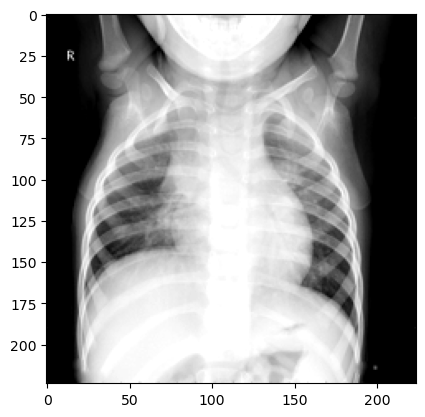

In [24]:
#viewing the third image of the validation set
plt.imshow(images_val[4], cmap='gray')
plt.show()



All the image's contrast has been enhanced this is becaues the chest X-rays were very subtle and with small differences in pixel intensities so by enhancing the contrast makes the features more distinct which can help the model identify key features more easily hence potentially improving the models performance.

#### (iv) Image Augmentation

In [25]:
#converting all the images in the train set to grayscale
images = [img if img.ndim == 2 else img.mean(axis=-1) for img in images]

In [26]:
#converting all the images in the validation set to grayscale
images_val = [img if img.ndim == 2 else img.mean(axis=-1) for img in images_val]

In [27]:
#converting all the images in the test set to grayscale
images_test = [img if img.ndim == 2 else img.mean(axis=-1) for img in images_test]

In [28]:

# Ensuring all images have the same shape
max_shape = tuple(max(dim) for dim in zip(*[img.shape for img in images]))

images_resized = [np.array(Image.fromarray(img).resize(max_shape)) for img in images]
# Converting list of images to a 4D array
images_array = np.array(images_resized)
images_array = np.expand_dims(images_array, axis=-1)

# Creating an ImageDataGenerator object
datagen = ImageDataGenerator(
    rotation_range=20,     # randomly rotating images in the range (degrees, 0 to 180)
    width_shift_range=0.2, # randomly shifting images horizontally (fraction of total width)
    height_shift_range=0.2,# randomly shifting images vertically (fraction of total height)
    horizontal_flip=True)  # randomly flipping images horizontally

# Fitting the ImageDataGenerator to your data
datagen.fit(images_array)

# Using the ImageDataGenerator to create augmented images
augmented_images = []
for img in datagen.flow(images_array, batch_size=1):
    augmented_images.append(img[0][..., 0])
    if len(augmented_images) == len(images):
        break  # Stop the loop after creating one augmented image per original image
    

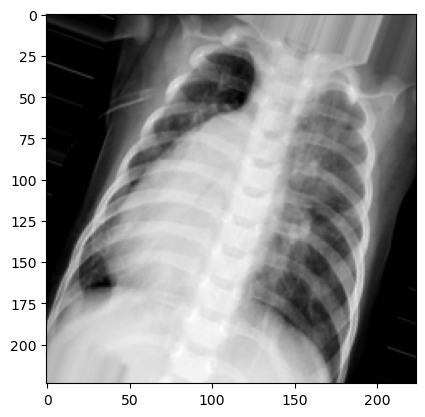

In [29]:
#viewing the third image of the augmented train set
plt.imshow(augmented_images[4], cmap='gray')
plt.show()

All the images in the train set have been either flipped,shifted or rotated.The image augmentation increase the diversity in the images for training models without actually collecting new images.This process helps prevent overfitting byenabling the model to generalize better to unseen data due to increased diversity

#### (v) Class Balancing

In [30]:

# Converting your list of images to a numpy array
images_array = np.array(augmented_images)

# Reshaping the images for SMOTE
n_samples, nx, ny = images_array.shape
images_2d = images_array.reshape((n_samples,nx*ny))

# Applying SMOTE
sm = SMOTE(random_state=42)
images_res, labels_res = sm.fit_resample(images_2d, labels)

# Reshaping the images back to their original shape
images_res = images_res.reshape((-1, nx, ny))

In [31]:
#checking for the unique label count
unique_classes, counts = np.unique(labels_res, return_counts=True)
print('Counts for each class after SMOTE:', dict(zip(unique_classes, counts)))

Counts for each class after SMOTE: {0: 3875, 1: 3875}


In [32]:
#checking for the number of images in the 
print('Number of images after SMOTE:', len(images_res))

Number of images after SMOTE: 7750


The class imbalance in the training data set has beeen balanced.This is to avoid bias towards the majority class leading it to mostly predicting the majority class.Balancing helps improve the model's ability to predict the minority class.

## 4. Exploratory Data Analysis

- #### What are the common characteristics of chest X-rays images with pneumonia and how do they differ from those without pneumonia?

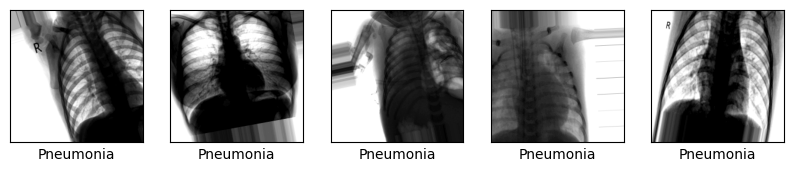

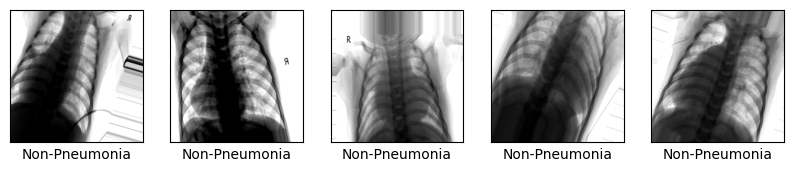

In [33]:
# Getting indices of pneumonia cases
pneumonia_cases = [i for i, label in enumerate(labels_res) if label == 1]

# Getting indices of non-pneumonia cases
non_pneumonia_cases = [i for i, label in enumerate(labels_res) if label == 0]

# Ploting some pneumonia cases
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_res[pneumonia_cases[i]], cmap=plt.cm.binary)
    plt.xlabel('Pneumonia')
plt.show()

# Ploting some non-pneumonia cases
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_res[non_pneumonia_cases[i]], cmap=plt.cm.binary)
    plt.xlabel('Non-Pneumonia')
plt.show()

The chest X-rays of pneumonia cases appear to have an area of increased density and a patchy consolidated area in the lung as compared to the chest X-rays of non-pneumonia cases.The X-rays of the healthy lungs appear to be a tad bit darker and this might be because air in the lungs shows up as black on the image which might allow the white appearance of the bones and tissues to standout.

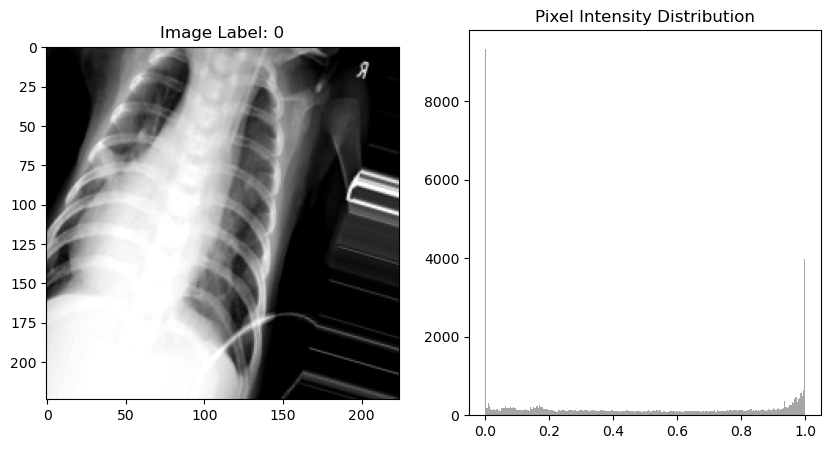

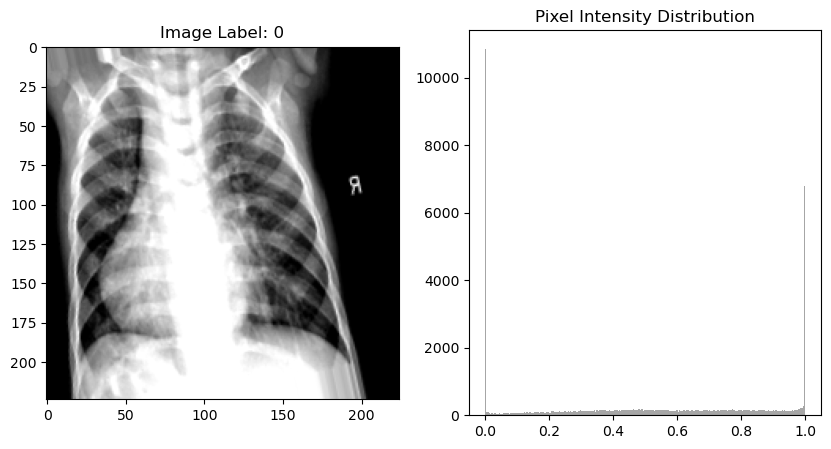

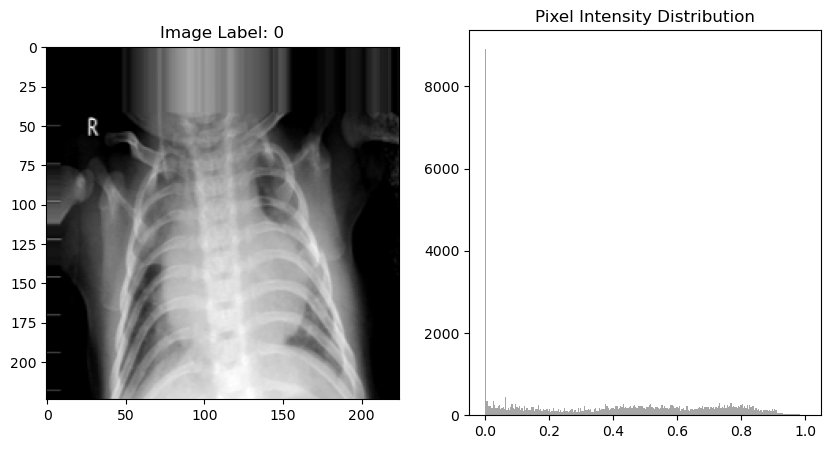

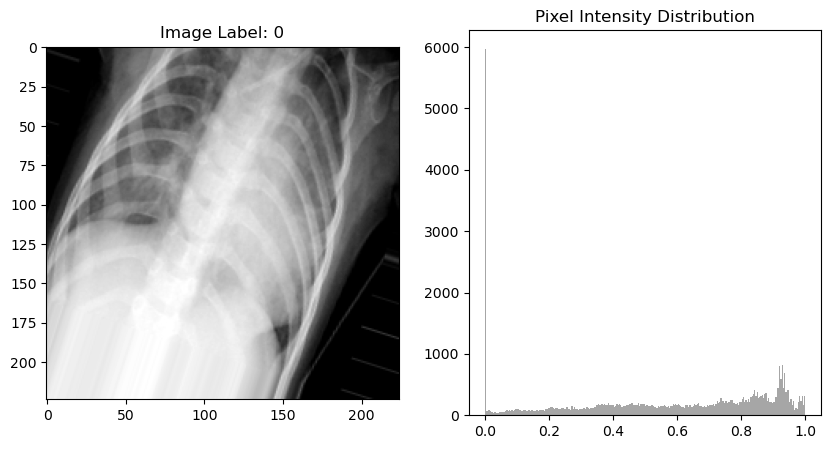

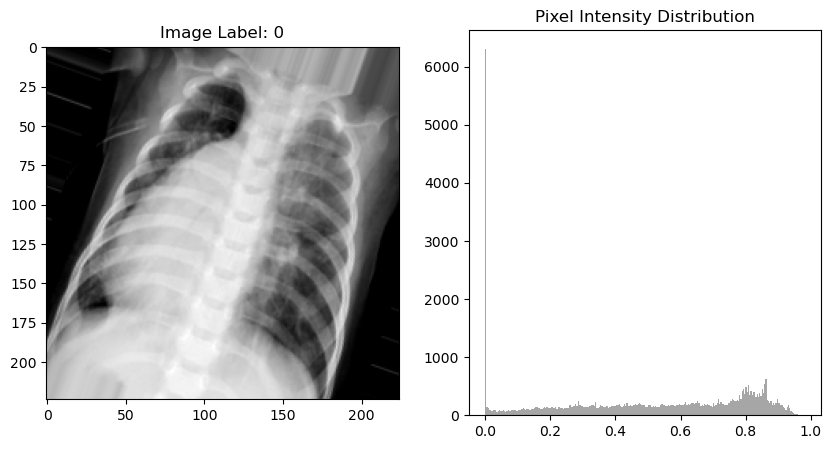

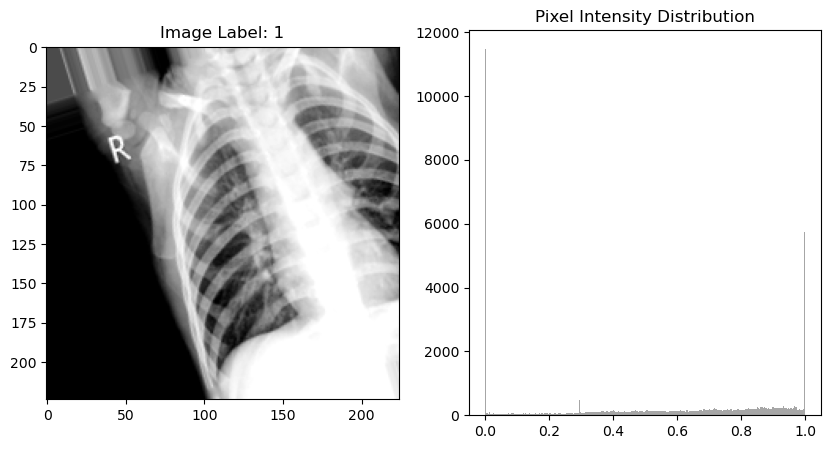

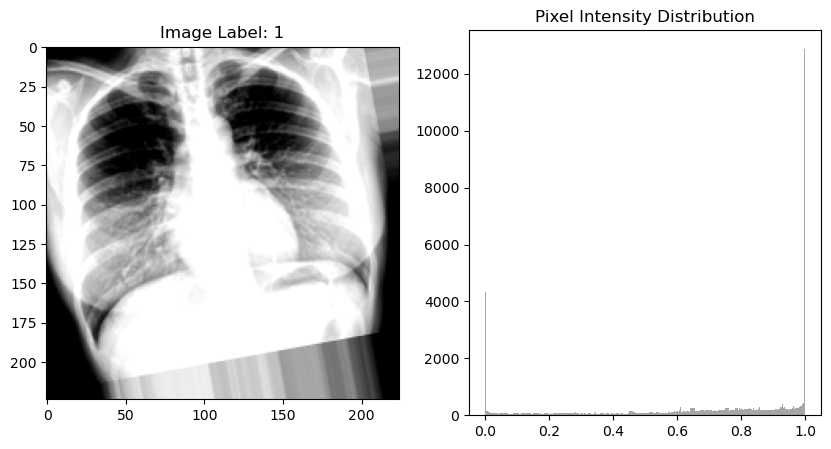

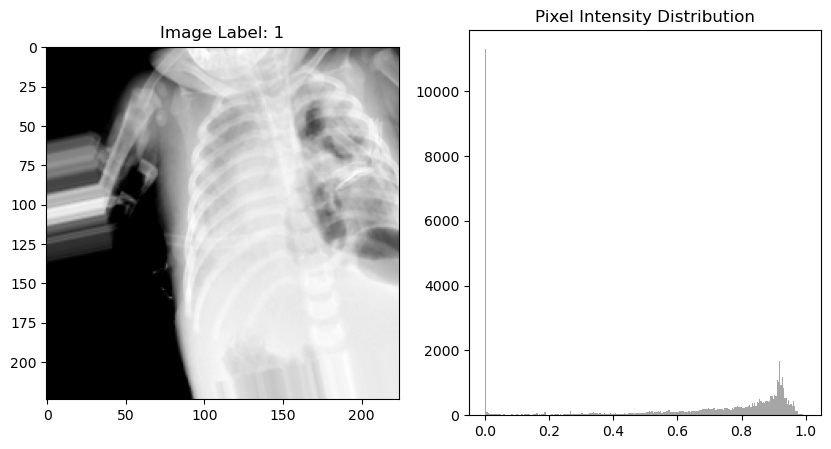

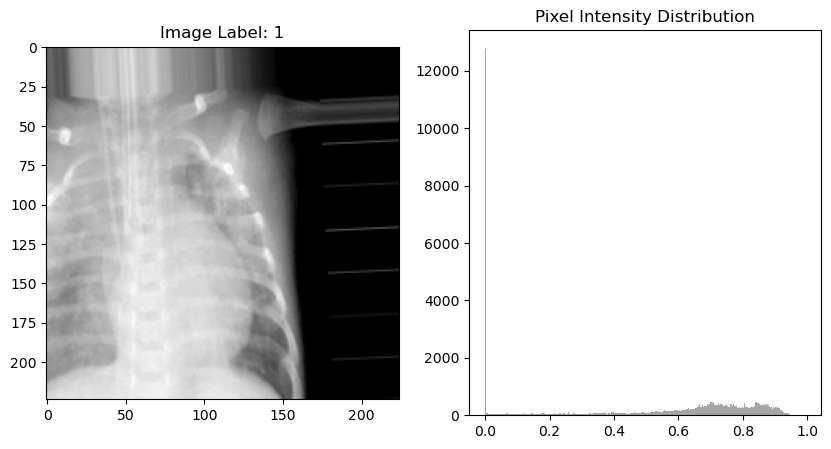

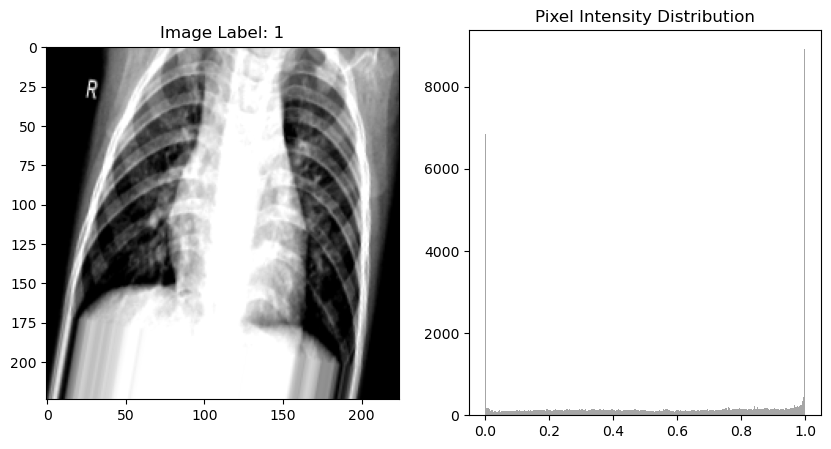

In [34]:
# Get indices of cases for each class
indices_0 = [i for i, label in enumerate(labels_res) if label == 0]
indices_1 = [i for i, label in enumerate(labels_res) if label == 1]

# Select the first few cases from each class
selected_indices = indices_0[:5] + indices_1[:5]

for i in selected_indices:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(images_res[i], cmap='gray')
    plt.title('Image Label: ' + str(labels_res[i]))

    plt.subplot(1,2,2)
    plt.hist(images_res[i].ravel(), bins=256, color='gray', alpha=0.7)
    plt.title('Pixel Intensity Distribution')
    plt.show()

- #### Are there any noticeable patterns or correlations in the chest X-ray images that might be indicative of pneumonia?

In [35]:
# Calculate image statistics
image_stats = []
for img in images_res:
    stats = {
        'mean': np.mean(img),
        'std': np.std(img),
        'min': np.min(img),
        'max': np.max(img),
    }
    image_stats.append(stats)

# Convert to DataFrame for easier analysis
import pandas as pd
df_stats = pd.DataFrame(image_stats)
df_stats['label'] = labels_res

# Calculate mean stats for each class
mean_stats = df_stats.groupby('label').mean()
print(mean_stats)

           mean       std       min       max
label                                        
0      0.500832  0.323640  0.000258  0.987964
1      0.504045  0.338231  0.000185  0.995841


For both classes(0,1) the mean pixel intensity is around 0.5 which suggests that the images on average have a balanced distribution of black and white pixels.
The std values are also quite similar for both classes,indicating a similar range of pixel intensities within each image.
The minimum pixel values are also close to 0 for both classes which is expected as the images are likely to contain black pixels.
The maximum pixel values are close to 1 for both classes suggesting that the images likely contain white pixels.The group of pneumonia cases is more close to 1 which might be due to the patchy consolidated area that indicates pneumonia in X-rays.

- #### Is the data quality sufficient for training the neural network model and there any issues with the data such as quality of images?

In [36]:
# Function to calculate brightness
def calculate_brightness(image):
    greyscale_image = image.convert('L')
    histogram = greyscale_image.histogram()
    pixels = sum(histogram)
    brightness = scale = len(histogram)

    for index in range(0, scale):
        ratio = histogram[index] / pixels
        brightness += ratio * (-scale + index)

    return 1 if brightness == 255 else brightness / scale

# Function to calculate contrast
def calculate_contrast(image):
    greyscale_image = image.convert('L')
    contrast = np.std(np.array(greyscale_image)) / 128.
    return contrast

# Function to calculate sharpness
def calculate_sharpness(image):
    # Ensure the image is in the correct format
    if image.mode != 'L':
        image = image.convert('L')
    image = np.array(image)
    if image.dtype != np.uint8:
        image = img_as_ubyte(image)
    
    # Calculate edges using Sobel filter
    edges = filters.sobel(image)
    
    # Calculate sharpness as average absolute edge intensity
    sharpness = np.average(np.absolute(edges))
    
    return sharpness

# List to store image quality metrics
image_quality_metrics = []

for image in images_res:
    pil_image = Image.fromarray(image)
    
    brightness = calculate_brightness(pil_image)
    contrast = calculate_contrast(pil_image)
    sharpness = calculate_sharpness(pil_image)
    
    image_quality_metrics.append({
        'brightness': brightness,
        'contrast': contrast,
        'sharpness': sharpness
    })

In [43]:
image_quality_metrics[:10]

[{'brightness': 0.00024328426438939565,
  'contrast': 0.0018880062759126937,
  'sharpness': 8.884978801165315e-05},
 {'brightness': 0.0004923295001594274,
  'contrast': 0.002592893189678715,
  'sharpness': 0.00011579896791035896},
 {'brightness': 1.557019292001223e-07,
  'contrast': 4.9322871687792646e-05,
  'sharpness': 3.7041022130020266e-07},
 {'brightness': 1.027632732776302e-05,
  'contrast': 0.00040018146244369916,
  'sharpness': 1.4437286720314013e-05},
 {'brightness': 0.0, 'contrast': 0.0, 'sharpness': 0.0},
 {'brightness': 0.0006087166922432719,
  'contrast': 0.002833558587825405,
  'sharpness': 8.746617217381364e-05},
 {'brightness': 4.515355947025618e-06,
  'contrast': 0.00026546352464245726,
  'sharpness': 7.023310780374005e-06},
 {'brightness': 5.348361268335024e-05,
  'contrast': 0.0009078763466875668,
  'sharpness': 3.118013491593188e-05},
 {'brightness': 0.00024172724509728682,
  'contrast': 0.00188235489760975,
  'sharpness': 6.067444416536942e-05},
 {'brightness': 0.0

The brightness values in the dataset vary significantly,ranging from very small values close to 0 and larger values.This indicates that the dataset includes images with a wide range of brighness levels.Some images are very dark(low brightness)while others are much brighter.

The contrast values in the dataset also vary byt are genuinely low.This suggests that many of the images have low contrast,meaning the difference in brightness between different regions of the image may be small.

The sharpness is also relatively low indicating that the images may not be very sharp of detailed.

## 5. Modelling

### The Baseline model

In [52]:
# Initializing the CNN
model = Sequential()

# Adding the convolutional layer
model.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape=(224, 224, 1)))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flattening layer
model.add(Flatten())

# Full connection layer
model.add(Dense(128, activation='relu'))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compiling the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics= [Recall(),tfa.metrics.F1Score(num_classes=1, average='micro')])

#creating variables for each set
train_data = (np.array(images_res), np.array(labels_res))
val_data = (np.array(images_val), np.array(labels_val))
test_data = (np.array(images_test), np.array(labels_test))


# Fitting the model
history = model.fit(*train_data,
                    epochs=10,
                    validation_data=val_data)

# Evaluating the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(*test_data)
print("test loss, test recall, test f1 score:", results)

# Generating a summary of the model
print(model.summary())

Epoch 1/10
243/243 [==============================] - 507s 2s/step - loss: 0.9649 - recall_9: 0.6183 - f1_score: 0.6667 - val_loss: 1.5965 - val_recall_9: 0.8750 - val_f1_score: 0.6667
Epoch 2/10
243/243 [==============================] - 383s 2s/step - loss: 0.4223 - recall_9: 0.8077 - f1_score: 0.6667 - val_loss: 1.7157 - val_recall_9: 0.8750 - val_f1_score: 0.6667
Epoch 3/10
243/243 [==============================] - 358s 1s/step - loss: 0.2190 - recall_9: 0.9143 - f1_score: 0.6667 - val_loss: 2.5571 - val_recall_9: 0.8750 - val_f1_score: 0.6667
Epoch 4/10
243/243 [==============================] - 355s 1s/step - loss: 0.1051 - recall_9: 0.9683 - f1_score: 0.6667 - val_loss: 3.0737 - val_recall_9: 0.8750 - val_f1_score: 0.6667
Epoch 5/10
243/243 [==============================] - 347s 1s/step - loss: 0.0467 - recall_9: 0.9907 - f1_score: 0.6667 - val_loss: 4.6084 - val_recall_9: 1.0000 - val_f1_score: 0.6667
Epoch 6/10
243/243 [==============================] - 351s 1s/step - loss: 

From the output below the model appears to be overfitting on the training dataset.This indicated by the training loss decreasing while the validation loss is increasing which is a sign of overfitting.

The recall on the training data is 1.0 which means that the model is predicting the training data perfectly. The recall of the test data is significantly lower meaning that the model isn't generalizing to unseen data

#### Model Tuning with Regularization